# Stock Price Regression Project

## Project Overview
This project focuses on developing a predictive regression model to estimate stock prices using historical stock market data from the NSE (National Stock Exchange) for the years 2007 to 2012. The goal is to leverage machine learning techniques to predict future stock prices based on historical patterns and trends.

---

## Objectives
1. **Data Preparation**
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

2. **Exploratory Data Analysis (EDA)**
   - Analyze data distributions and trends over time.
   - Identify correlations and relationships between features.
   - Visualize key insights.

3. **Feature Engineering**
   - Create new predictive features from the data (e.g., moving averages, price change trends).
   - Select relevant features for the regression model.

4. **Model Development**
   - Split the data into training and testing sets.
   - Implement multiple regression algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting).
   - Tune hyperparameters for optimal performance.

5. **Model Evaluation**
   - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
   - Compare models to determine the best-performing approach.

6. **Deployment and Reporting**
   - Package the final model for deployment.
   - Present findings and insights through visualizations and a detailed report.

---

## Workflow
### 1. Data Preparation
- Merge datasets from 2007 to 2012.
- Clean data by addressing missing values and outliers.
- Convert necessary columns to numeric types.

### 2. Exploratory Data Analysis
- Analyze stock performance trends over time.
- Examine correlations between features (e.g., trading volume and stock prices).
- Visualize distributions and detect anomalies.

### 3. Feature Engineering
- Generate lagged features, moving averages, or volatility measures.
- Normalize or scale features for regression models.

### 4. Model Development
- Train-test split (e.g., 80-20 or time-based split).
- Build baseline regression models and evaluate performance.
- Experiment with advanced algorithms and fine-tune.

### 5. Model Evaluation
- Use evaluation metrics to compare models.
- Plot predictions vs. actual values for validation.
- Identify key factors influencing stock price predictions.
---

## Tools and Technologies
- **Data Handling**: Python (Pandas, NumPy)
- **Visualization**: Matplotlib, Seaborn
- **Modeling**: Scikit-learn, XGBoost

---

## Deliverables
1. Cleaned and preprocessed datasets.
2. Feature-engineered dataset ready for modeling.
3. Trained regression models with evaluation results.
4. Final model packaged for deployment.
5. Comprehensive project report.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

### Data Preparation
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

In [38]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

path = os.path.join(current_dir, "Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012")
print(f"Full path: {path}")
print(f"Full path: {path}")
if not os.path.isdir(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

csv_pattern_lower = os.path.join(path, "NSE_data_all_stocks_*.csv")
csv_files = glob.glob(csv_pattern_lower)

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Successfully read: {file} with {len(df)} rows.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not df_list:
    raise ValueError("No DataFrames were loaded. Please check the CSV files for readability.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True, sort=False)

# Create a new directory for combined output
combined_output_dir = os.path.join(current_dir, "Combined_NSE_Data")
if not os.path.exists(combined_output_dir):
    os.makedirs(combined_output_dir)
    print(f"Created new directory: {combined_output_dir}")

output_file = os.path.join(combined_output_dir, "NSE_data_all_stocks_2007_2012_combined.csv")
combined_df.to_csv(output_file, index=False)

print(f"All CSV files have been successfully combined into '{output_file}'.")

Current working directory: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2007.csv with 10608 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2008.csv with 10583 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_bas

In [39]:
data = pd.read_csv(output_file)
data

C:\Users\HP\AppData\Local\Temp\ipykernel_7640\2145235027.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
0,1/2/2007,EGAD,Eaagads,22,57,52,52,52,52,-,-,300,26,NaN,NaN
1,1/2/2007,KAPC,Kapchorua Tea,111,148,100,100,100,98.5,1.5,1.50%,"7,800",-,NaN,NaN
2,1/2/2007,KUKZ,Kakuzi,67.5,89,42.5,45,43.5,42.25,1.25,2.87%,"2,700",-,NaN,NaN
3,1/2/2007,REA,Rea Vipingo Plantations,14.5,23.5,25,26.5,25.5,25.75,-0.25,0.98%,"10,500",-,NaN,NaN
4,1/2/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140,145,140,141,-1,0.71%,"70,900",23.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19,19,19,19,-,-,"1,000",-,NaN,NaN
81500,12/31/2012,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,NaN,NaN
81501,12/31/2012,KUKZ,Kakuzi,67.5,89,72,72,72,69,3,4.17%,"1,000",-,NaN,NaN
81502,12/31/2012,KAPC,Kapchorua Tea,111,148,118,118,118,118,-,-,100,-,NaN,NaN


In [40]:
# Display the shape of the merged dataset
data.shape

(81504, 15)

In [41]:
# Display Unique values for each column
unique_values = {column: data[column].unique() for column in data.columns}
unique_values['NAME']

array(['Eaagads', 'Kapchorua Tea', 'Kakuzi', 'Rea Vipingo Plantations',
       'Sasini Tea and Coffee', 'Unilever Tea Kenya',
       'Williamson Tea Kenya', 'Car and General (K)', 'CMC Holdings',
       'Sameer Africa', 'Barclays Bank', 'CFC Stanbic Holdings',
       'Diamond Trust Bank Kenya', 'Equity Bank', 'Housing Finance',
       'Kenya Commercial Bank', 'National Bank of Kenya', 'NIC Bank',
       'Standard Chartered Bank', 'Kenya Airways', 'Nation Media Group',
       'ScanGroup', 'Standard Group', 'TPS Eastern Africa (Serena)',
       'Express', 'Athi River Mining', 'Bamburi Cement', 'Crown Berger',
       'E.A.Cables', 'E.A.Portland Cement', 'KenGen', 'KenolKobil',
       'Kenya Power and Lighting', 'Total Kenya', 'Jubilee Holdings',
       'Pan Africa Insurance Holdings', 'Centum Investment',
       'Olympia Capital Holdings', 'British American Tobacco Kenya',
       'A.Baumann', 'East African Breweries', 'Eveready East Africa',
       'Mumias Sugar', 'Unga Group', 'NSE 20-Sh

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB


In [43]:
# Investigate rows containing '-' in each column
columns_with_dash = [column for column in data.columns if '-' in data[column].values]
dash_rows = {column: data[data[column] == '-'] for column in columns_with_dash}
for column, data in dash_rows.items():
    # Let's print the count
    print(f'Column: {column}, Count of rows: {len(data)}')


Column: Previous, Count of rows: 12
Column: Change, Count of rows: 30363
Column: Change%, Count of rows: 30373
Column: Adjust, Count of rows: 54733
Column: Adjusted, Count of rows: 6262


#### Data Cleaning Steps
1. **Step 1: Replace '-' with np.nan**
    - To ensure missing values are handled appropriately, replace all occurrences of '-' with np.nan across the dataset.

2. **Step 2: Drop the 'Adjust' Column**
    - The 'Adjust' column contains too many missing values (60k out of 80k rows), making it unreliable for analysis. Drop this column.

3. **Step 3: Handle Missing Values in 'Previous'**
    - Use forward-fill (method='ffill') to propagate the last valid observation forward to fill missing values in 'Previous'.

4. **Step 4: Recalculate 'Change' and 'Change%'**
    - Since 'Change' and 'Change%' columns have many missing values, we will recalculate them based on 'Day_Price' and 'Previous'.

5. **Step 5: Verify the Dataset**
    - Check for any remaining missing values in critical columns and ensure the dataset's integrity.


In [44]:
# Replace ',' with '' in all columns to handle thousands separators
stocks_data = data.replace(',', '', regex=True)

# Convert columns to numeric where applicable
# This step is critical if some columns need to remain as strings
numeric_columns = ['12m Low', '12m High', 'Day Low', 'Day High',
                    'Day Price', 'Previous', 'Change', 'Change%', 'Volume']

# Apply numeric conversion to these columns
for col in numeric_columns:
    stocks_data[col] = pd.to_numeric(stocks_data[col], errors='coerce')



C:\Users\HP\AppData\Local\Temp\ipykernel_7640\3619867807.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stocks_data = data.replace(',', '', regex=True)


In [45]:
stocks_data

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted
10608,NaN,^N20I,NSE 20-Share Index,3396.83,5030.91,5167.18,5167.18,5167.18,5444.83,-277.65,NaN,4790000,NaN,1/2/2008,-
10609,NaN,ACCS,AccessKenya Group,3.90,10.10,21.00,25.00,21.25,23.25,-2.00,NaN,538100,NaN,1/2/2008,-
10611,NaN,MSC,Mumias Sugar,4.00,7.35,13.35,14.20,13.60,14.80,-1.20,NaN,617200,NaN,1/2/2008,-
10612,NaN,EVRD,Eveready East Africa,1.40,3.00,7.20,8.00,7.70,7.95,-0.25,NaN,23900,NaN,1/2/2008,-
10613,NaN,EABL,East African Breweries,200.00,325.00,155.00,170.00,165.00,168.00,-3.00,NaN,29500,NaN,1/2/2008,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21185,NaN,CMC,CMC Holdings,13.50,13.50,15.50,16.50,16.00,15.40,0.60,NaN,328900,NaN,12/31/2008,-
21187,NaN,WTK,Williamson Tea Kenya,180.00,290.00,57.50,57.50,57.50,52.50,5.00,NaN,1000,NaN,12/31/2008,-
21188,NaN,SASN,Sasini Tea and Coffee,10.50,13.60,7.00,7.35,7.00,6.70,0.30,NaN,26700,NaN,12/31/2008,-
21189,NaN,REA,Rea Vipingo Plantations,14.50,23.50,13.50,14.00,13.95,13.65,0.30,NaN,1100,NaN,12/31/2008,-


In [46]:
# Step 1: Replace '-' with np.nan
stocks_data = stocks_data.replace('-', np.nan)

# Step 2: Drop the 'Adjust' Column
stocks_data = stocks_data.drop(columns='Adjusted')

# Step 3: Handle Missing Values in 'Previous'
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')

# Step 4: Recalculate 'Change' and 'Change%'
stocks_data['Day Price'] = pd.to_numeric(stocks_data['Day Price'], errors='coerce')
stocks_data['Previous'] = pd.to_numeric(stocks_data['Previous'], errors='coerce')
stocks_data['Change'] = stocks_data['Day Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100



C:\Users\HP\AppData\Local\Temp\ipykernel_7640\531554545.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stocks_data = stocks_data.replace('-', np.nan)
C:\Users\HP\AppData\Local\Temp\ipykernel_7640\531554545.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')


In [47]:
# Investigate columns with missing values and their count
missing_values_count = stocks_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
print(missing_values_count)

DATE      6262
NAME        25
Adjust    6262
dtype: int64


In [48]:
# Check rows with missing Name values
missing_name_rows = stocks_data[stocks_data['NAME'].isnull()]
missing_name_rows

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date
15053,NaN,HFCK-R,NaN,11.05,11.05,5.00,20.00,6.55,31.75,-25.20,-79.370079,17200,NaN,5/30/2008
15097,NaN,HFCK-R,NaN,11.05,11.05,8.00,11.00,10.05,6.55,3.50,53.435115,24200,NaN,6/3/2008
15141,NaN,HFCK-R,NaN,11.05,11.05,8.00,15.00,11.85,10.05,1.80,17.910448,131900,NaN,6/4/2008
15186,NaN,HFCK-R,NaN,11.05,11.05,11.00,15.00,13.05,11.85,1.20,10.126582,5820000,NaN,6/5/2008
15230,NaN,HFCK-R,NaN,11.05,11.05,8.00,14.00,9.70,13.05,-3.35,-25.670498,17540000,NaN,6/6/2008
15272,NaN,HFCK-R,NaN,11.05,11.05,9.00,13.50,9.25,9.70,-0.45,-4.639175,162500,NaN,6/9/2008
15316,NaN,HFCK-R,NaN,11.05,11.05,9.55,11.00,10.45,9.25,1.20,12.972973,118200,NaN,6/10/2008
15359,NaN,HFCK-R,NaN,11.05,11.05,10.00,12.00,10.40,10.45,-0.05,-0.478469,137100,NaN,6/11/2008
15404,NaN,HFCK-R,NaN,11.05,11.05,10.05,13.25,11.65,10.40,1.25,12.019231,254700,NaN,6/12/2008
15448,NaN,HFCK-R,NaN,11.05,11.05,10.00,12.50,11.05,11.65,-0.60,-5.150215,342600,NaN,6/13/2008


In [49]:
# Let's back-fill the Day_price and Previous columns
stocks_data['Day Price'] = stocks_data['Day Price'].fillna(method='bfill')
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


C:\Users\HP\AppData\Local\Temp\ipykernel_7640\1512297203.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Day Price'] = stocks_data['Day Price'].fillna(method='bfill')
C:\Users\HP\AppData\Local\Temp\ipykernel_7640\1512297203.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


In [50]:
# Let's recalculate the Change and Change% columns again
stocks_data['Change'] = stocks_data['Day Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100

# Exploratory Data Analysis (EDA) for Stock Price Prediction

## Objective
The purpose of Exploratory Data Analysis (EDA) is to:
1. Understand the dataset’s structure and distribution.
2. Identify relationships between features and the target variable (`Day_Price`).
3. Detect outliers, anomalies, and trends.
4. Ensure the dataset’s readiness for feature engineering and modeling.

---

## Steps in EDA

### 1. **Understand the Dataset**
- **View Basic Statistics:**
  - Use `df.describe()` to obtain an overview of numerical data.
  - Use `df.info()` to understand data types and non-null counts.
- **Check Class Distribution:**
  - Analyze the frequency of each stock (`Code`) to identify dominant ones.

---

### 2. **Univariate Analysis**
- **Numerical Columns:**
  - Plot histograms for `Day_Price`, `12m_Low`, `12m_High`, `Previous`, and `Volume` to observe distributions.
  - Calculate skewness and kurtosis to check normality.
- **Categorical Columns:**
  - Use bar charts to display the distribution of stocks (`Code`) and any other categorical data.

---

### 3. **Bivariate Analysis**
- **Target vs Features:**
  - Scatter plots of `Day_Price` vs other numerical features (`Previous`, `Day_High`, `Day_Low`) to understand relationships.
  - Correlation matrix (heatmap) to evaluate relationships between numerical features and target (`Day_Price`).
  - Boxplots of `Day_Price` grouped by `Code` to assess stock-specific behavior.

---

### 4. **Outlier Detection**
- Use boxplots to identify outliers in numerical columns (e.g., `Day_Price`, `Volume`, `12m_High`).
- Confirm outliers with interquartile range (IQR) analysis.

---

### 5. **Time-Series Analysis**
- For temporal insights:
  - Plot `Day_Price` trends over time for selected stocks.
  - Plot `Volume` trends over time to correlate trading activity with price.

---

### 6. **Missing Value Analysis**
- Review missing value statistics.
- Visualize missing data patterns using heatmaps.
- Address handling methods:
  - Forward fill for `Previous`.
  - Recalculation for `Change` and `Change%`.
  - Dropping irrelevant or excessively missing columns (e.g., `Adjust`).

---

### 7. **Feature-Target Relationships**
- Analyze how predictors like `Previous`, `Day_High`, and `Day_Low` influence `Day_Price`.
- Check whether engineered features (e.g., `Price Range`, `Momentum Indicator`) show strong correlations with `Day_Price`.

---

## Deliverables
1. Statistical summary tables.
2. Visualizations:
   - Histograms and boxplots for numerical data.
   - Correlation heatmaps.
   - Scatter plots and line charts.
3. Insights on:
   - Distributions, trends, and relationships.
   - Outliers and anomalies.
   - Missing data handling strategies.


In [51]:
# Display basic statistics of the dataset
stocks_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, 10608 to 21190
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       0 non-null      float64
 1   CODE       6262 non-null   object 
 2   NAME       6237 non-null   object 
 3   12m Low    6262 non-null   float64
 4   12m High   6262 non-null   float64
 5   Day Low    6262 non-null   float64
 6   Day High   6262 non-null   float64
 7   Day Price  6262 non-null   float64
 8   Previous   6262 non-null   float64
 9   Change     6262 non-null   float64
 10  Change%    6262 non-null   float64
 11  Volume     6262 non-null   int64  
 12  Adjust     0 non-null      float64
 13  Date       6262 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 733.8+ KB


In [52]:
stocks_data

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date
10608,NaN,^N20I,NSE 20-Share Index,3396.83,5030.91,5167.18,5167.18,5167.18,5444.83,-277.65,-5.099333,4790000,NaN,1/2/2008
10609,NaN,ACCS,AccessKenya Group,3.90,10.10,21.00,25.00,21.25,23.25,-2.00,-8.602151,538100,NaN,1/2/2008
10611,NaN,MSC,Mumias Sugar,4.00,7.35,13.35,14.20,13.60,14.80,-1.20,-8.108108,617200,NaN,1/2/2008
10612,NaN,EVRD,Eveready East Africa,1.40,3.00,7.20,8.00,7.70,7.95,-0.25,-3.144654,23900,NaN,1/2/2008
10613,NaN,EABL,East African Breweries,200.00,325.00,155.00,170.00,165.00,168.00,-3.00,-1.785714,29500,NaN,1/2/2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21185,NaN,CMC,CMC Holdings,13.50,13.50,15.50,16.50,16.00,15.40,0.60,3.896104,328900,NaN,12/31/2008
21187,NaN,WTK,Williamson Tea Kenya,180.00,290.00,57.50,57.50,57.50,52.50,5.00,9.523810,1000,NaN,12/31/2008
21188,NaN,SASN,Sasini Tea and Coffee,10.50,13.60,7.00,7.35,7.00,6.70,0.30,4.477612,26700,NaN,12/31/2008
21189,NaN,REA,Rea Vipingo Plantations,14.50,23.50,13.50,14.00,13.95,13.65,0.30,2.197802,1100,NaN,12/31/2008


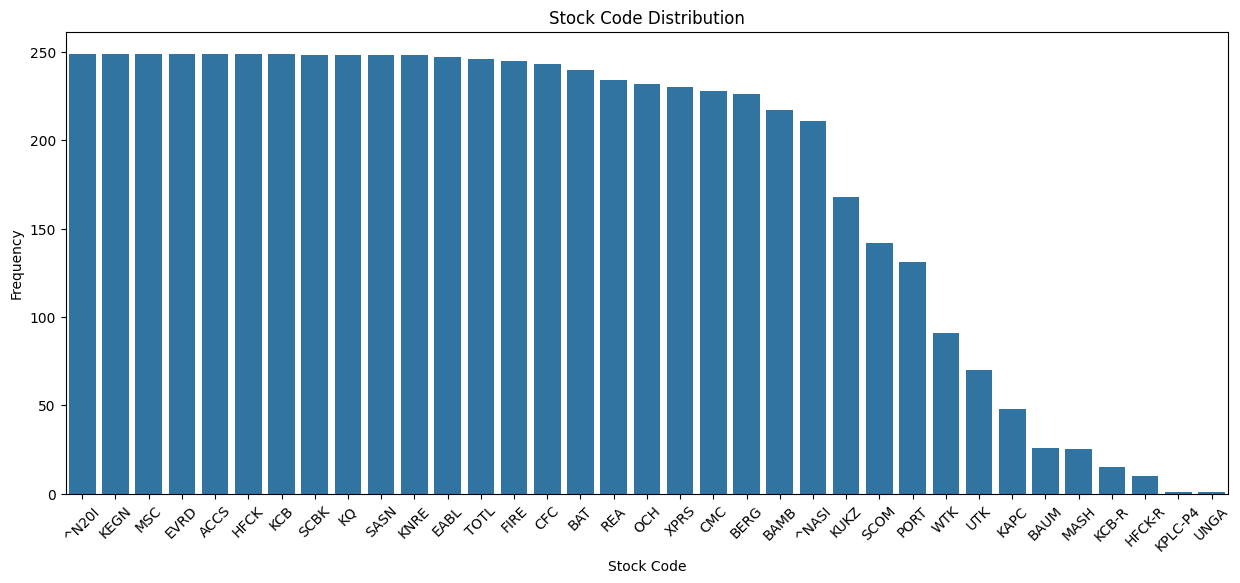

In [53]:
# Class Distribution
stock_counts = stocks_data['CODE'].value_counts()
stock_counts

# # Plot the class distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values)
plt.title('Stock Code Distribution')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


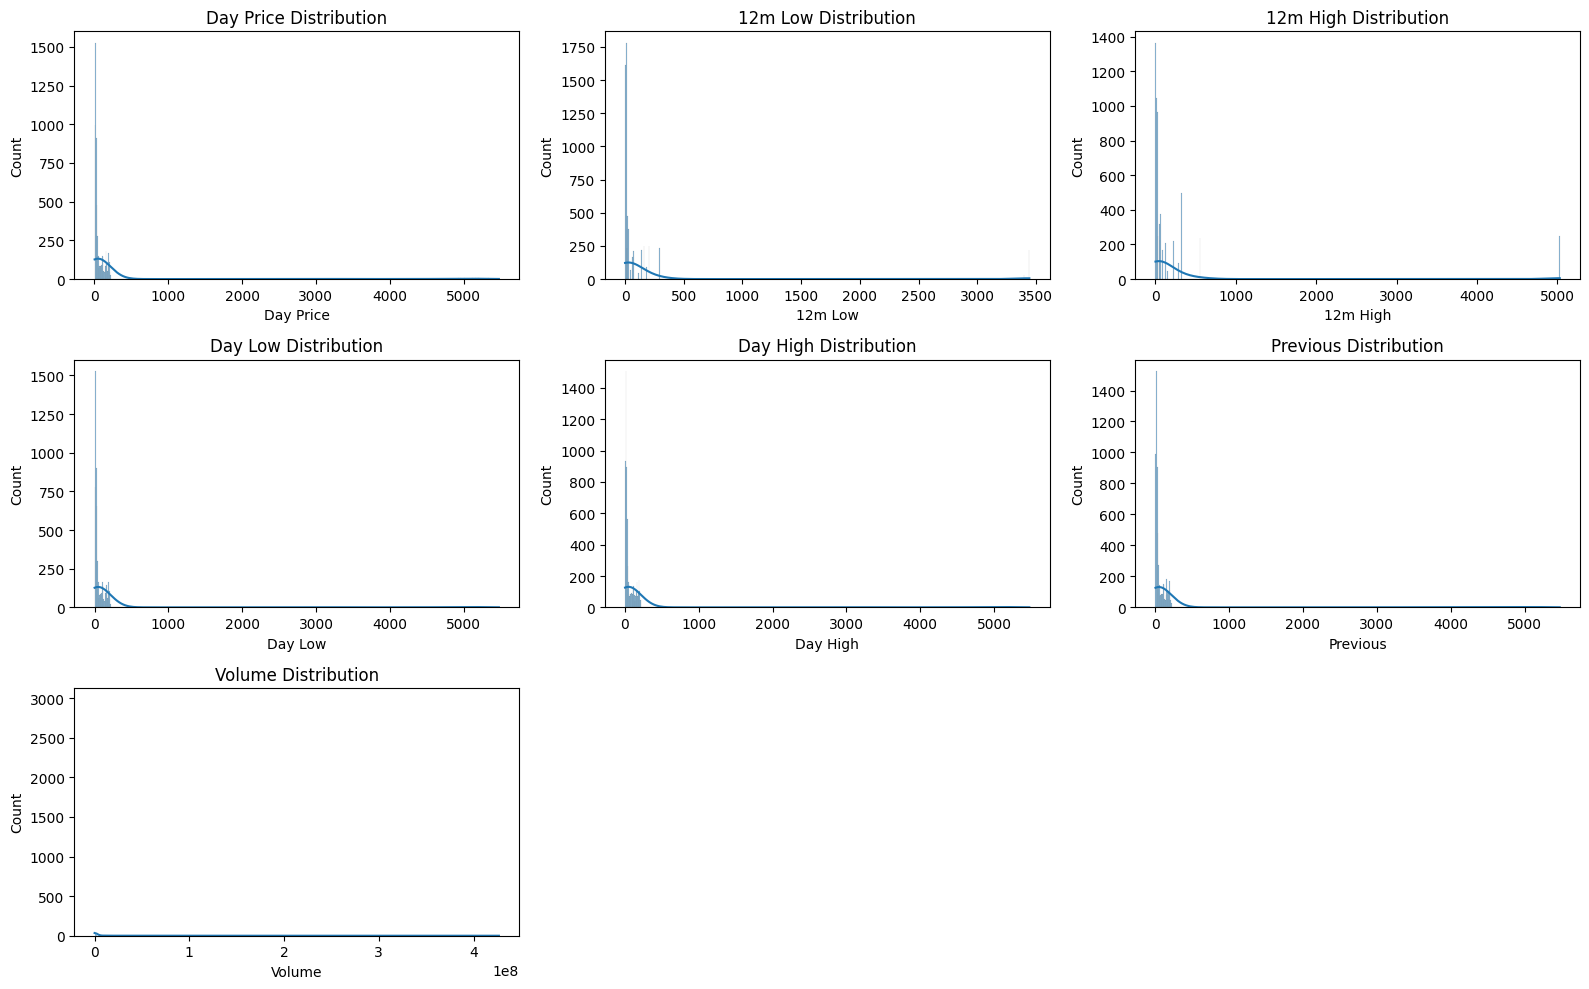

==>> Day Price: Skewness = 4.83, Kurtosis = 21.87
==>> 12m Low: Skewness = 4.62, Kurtosis = 19.64
==>> 12m High: Skewness = 4.58, Kurtosis = 19.36
==>> Day Low: Skewness = 4.83, Kurtosis = 21.87
==>> Day High: Skewness = 4.83, Kurtosis = 21.87
==>> Previous: Skewness = 4.83, Kurtosis = 21.85
==>> Volume: Skewness = 15.24, Kurtosis = 330.92


In [54]:
# Univariate Analysis
from scipy.stats import skew, kurtosis
# Numerical Columns
numerical_columns = ['Day Price', '12m Low', '12m High', 'Day Low','Day High','Previous', 'Volume']
# Plot histograms for numerical columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(stocks_data[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for numerical columns
for col in numerical_columns:
    skewness = skew(stocks_data[col].dropna())
    kurt = kurtosis(stocks_data[col].dropna())
    print(f'==>> {col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}')



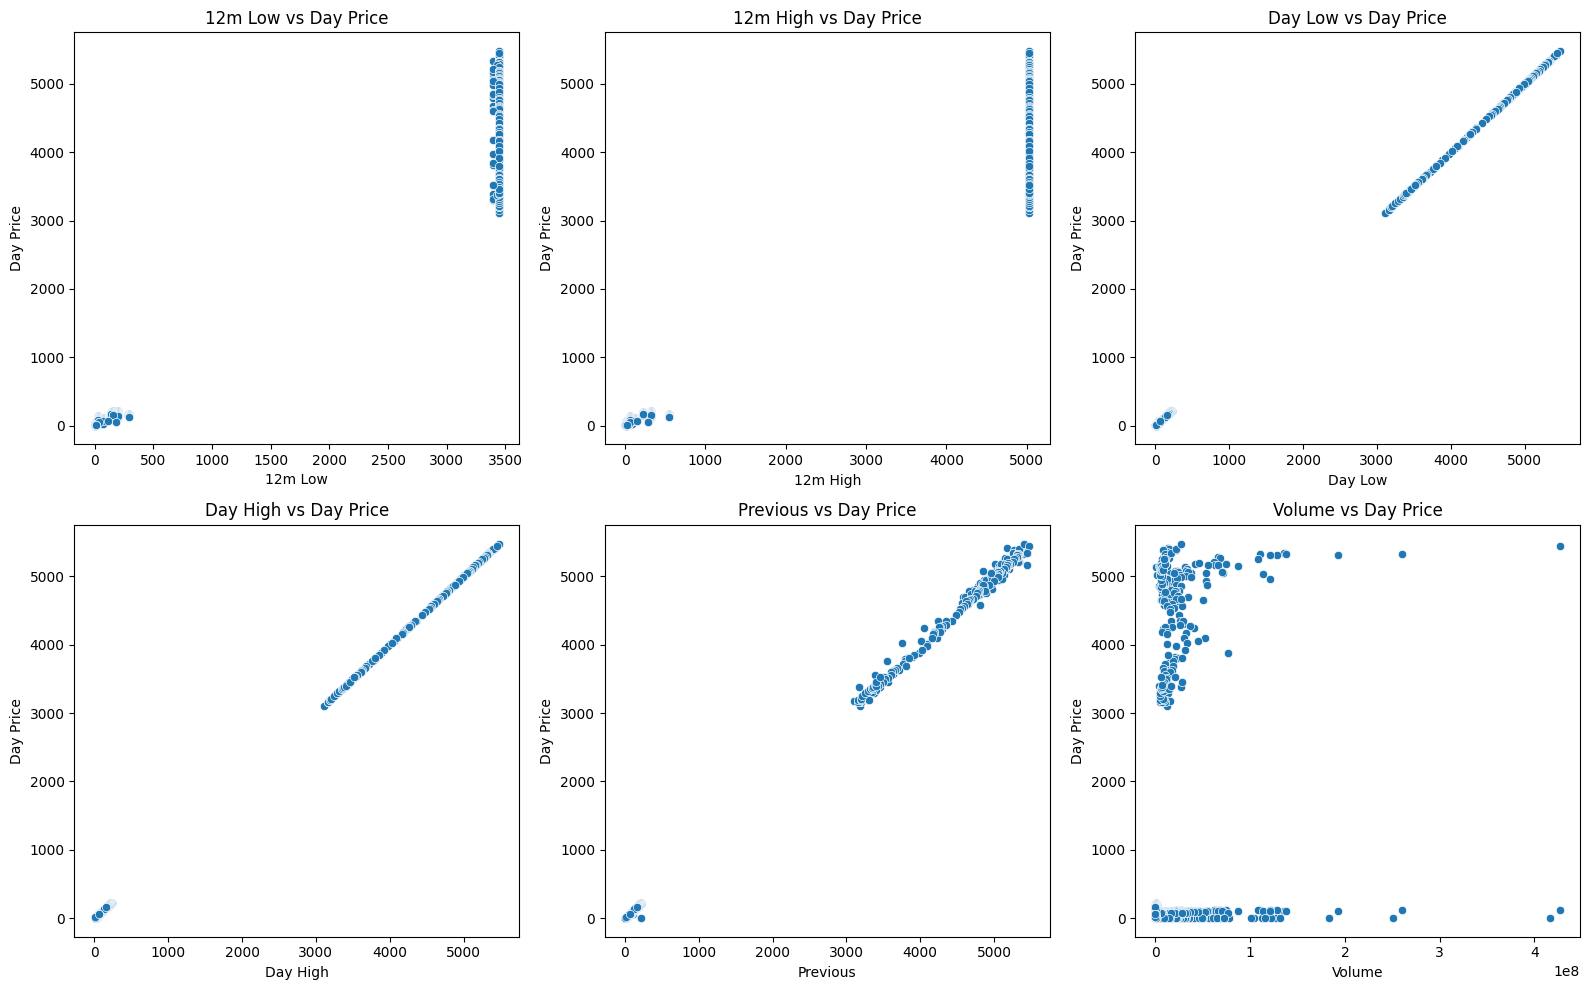

In [55]:
# Bi-variate Analysis
# Scatter plots of Day_Price vs other numerical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y='Day Price', data=stocks_data)
    plt.title(f'{column} vs Day Price')
plt.tight_layout()
plt.show()



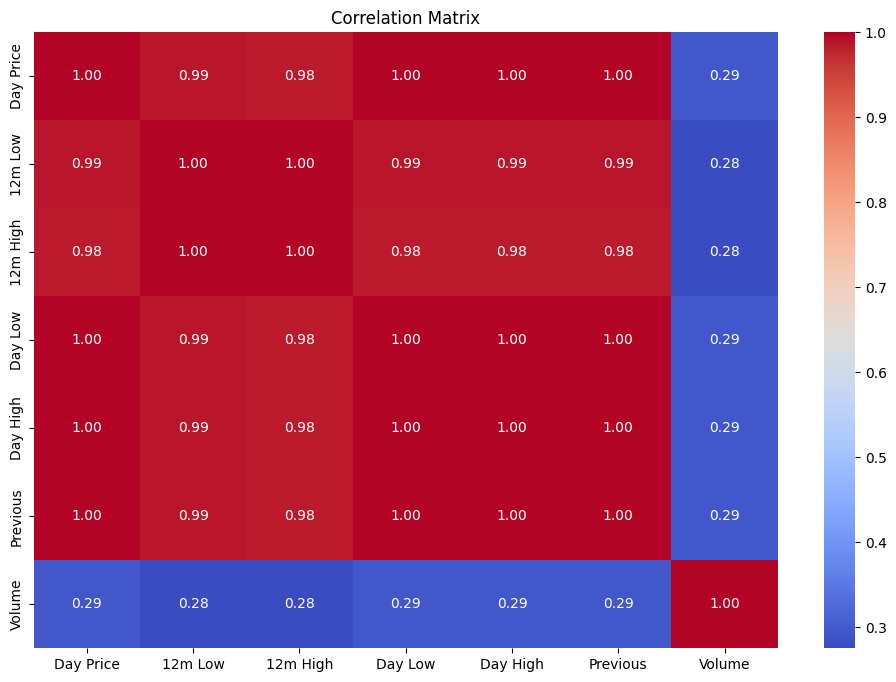

In [56]:
# Correlation matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(stocks_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

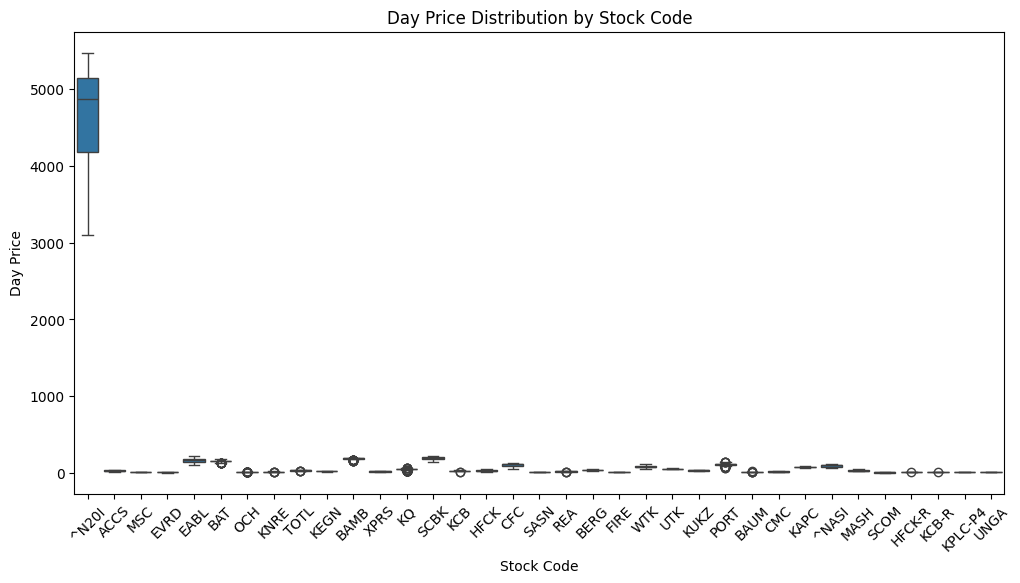

In [57]:
# Box-plots of Day_Price grouped by Code
plt.figure(figsize=(12, 6))
sns.boxplot(x='CODE', y='Day Price', data=stocks_data)
plt.title('Day Price Distribution by Stock Code')
plt.xlabel('Stock Code')
plt.ylabel('Day Price')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering for Stock Prediction

## Goal
To define the features and target variable for predicting stock performance using our dataset.

---

## Prediction Target (Dependent Variable)
### Chosen Target:
**Day_Price**: Predict the stock's closing price for the day.

---

## Features (Independent Variables)
We select features that are likely to influence the Day_Price directly or indirectly.

### Direct Predictors:
1. **12m_Low**: The 12-month lowest price (helps identify trends).
2. **12m_High**: The 12-month highest price (helps identify trends).
3. **Day_Low**: The day’s lowest price (correlates directly with closing prices).
4. **Day_High**: The day’s highest price.
5. **Previous**: The previous day's price (provides continuity in trends).
6. **Volume**: The number of trades (proxy for market activity).

### Excluded Predictors:
1. **Code** and **Name**: Relevant for stock identification but irrelevant for numerical prediction.
2. **Change** and **Change%**: Derivable from Day_Price and Previous.

---

## Finalized Features
**Target:** `Day_Price`

**Selected Features:**
- 12m_Low
- 12m_High
- Day_Low
- Day_High
- Previous
- Volume

---

### Simplicity Justification
For simplicity and alignment with the project’s scope, advanced engineered features like Price Range, Volatility Ratios, and Momentum Indicators are excluded. The current selection balances informativeness and computational efficiency.

---

**Next Steps:** Proceed to model training and evaluation based on this feature setup.



In [58]:
# Selected Features and Target Variable
selected_features = ['12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Volume']
target_variable = 'Day Price'


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [63]:
# We will use expanding window cross-validation to train and evaluate the model
# Define expanding window cross-validation function

def expanding_window_cv(stocks, features, target, model, initial_train_size, test_size, step_size):
    """
    Perform expanding window cross-validation and compute multiple regression metrics.

    Parameters:
        stocks (DataFrame): The dataset containing features and target.
        features (list): List of feature column names.
        target (str): Target column name.
        model: The regression model to use.
        initial_train_size (int): Number of initial rows for training.
        test_size (int): Number of rows for each test set.
        step_size (int): Increment for expanding the training set.

    Returns:
        dict: Dictionary with lists of metrics for each fold.
    """
    n_samples= stocks.shape[0]
    indices = np.arange(n_samples)
    print(f"======= Total samples: {n_samples}, Type: {type(n_samples)}")

    _metrics = {
        "MAE": [],
        "MSE": [],
        "RMSE": [],
        "R2": []
    }

    for start in range(0, n_samples - initial_train_size - test_size, step_size):
        train_start = start
        train_end = train_start + initial_train_size
        test_start = train_end
        test_end = test_start + test_size

        # Split train and test sets
        train_indices = indices[train_start:train_end]
        test_indices = indices[test_start:test_end]

        X_train = stocks_data.iloc[train_indices][features]
        y_train = stocks_data.iloc[train_indices][target]
        X_test = stocks_data.iloc[test_indices][features]
        y_test = stocks_data.iloc[test_indices][target]

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        _metrics["MAE"].append(mae)
        _metrics["MSE"].append(mse)
        _metrics["RMSE"].append(rmse)
        _metrics["R2"].append(r2)

        print(f"Fold {len(_metrics['MAE'])}: Train {train_start}-{train_end}, Test {test_start}-{test_end}, "
              f"MAE: {mae:}, MSE: {mse:}, RMSE: {rmse:}, R2: {r2:}")

    return _metrics


In [67]:
# Initialize the regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Define parameters for expanding window cross-validation
init_train_size=1000  # Use first 1000 rows for initial training
test_s=200           # Test on 200 rows in each fold
step_s=200             # Expand training set by 200 rows per fold

In [68]:
# Perform expanding window cross-validation for each model
results = {}

for model_name, m in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    results[model_name] = expanding_window_cv(
        stocks=stocks_data,
        features=selected_features,
        target=target_variable,
        model=m,
        initial_train_size=init_train_size,
        test_size=test_s,
        step_size=step_s
    )




Training and evaluating Random Forest...
======= Total samples: 6262, Type: <class 'int'>
Fold 1: Train 0-1000, Test 1000-1200, MAE: 1.4745710000000145, MSE: 23.61195998130182, RMSE: 4.859213926274683, R2: 0.9999745817936415
Fold 2: Train 200-1200, Test 1200-1400, MAE: 0.929152499999994, MSE: 5.320588116849518, RMSE: 2.3066400059067558, R2: 0.9999942031582499
Fold 3: Train 400-1400, Test 1400-1600, MAE: 0.7809375000000055, MSE: 4.838411741849773, RMSE: 2.199639002620606, R2: 0.9999945667168523
Fold 4: Train 600-1600, Test 1600-1800, MAE: 1.0541065000000456, MSE: 11.16181359545023, RMSE: 3.3409300494697924, R2: 0.99998835139995
Fold 5: Train 800-1800, Test 1800-2000, MAE: 0.7340649999999057, MSE: 2.6198720778984907, RMSE: 1.6186018898723957, R2: 0.9999973901777687
Fold 6: Train 1000-2000, Test 2000-2200, MAE: 0.9966415000000519, MSE: 7.958353549451875, RMSE: 2.821055396381268, R2: 0.9999915701838724
Fold 7: Train 1200-2200, Test 2200-2400, MAE: 0.8910190000000281, MSE: 7.22929939790083

In [69]:
# Display the results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, values in metrics.items():
        avg_value = np.mean(values)
        print(f"{metric_name}: {avg_value:.4f}")


Random Forest Results:
MAE: 2.6059
MSE: 466.1296
RMSE: 12.6805
R2: 0.9992

Gradient Boosting Results:
MAE: 2.5490
MSE: 385.9713
RMSE: 11.5066
R2: 0.9994

XGBoost Results:
MAE: 3.6871
MSE: 500.6498
RMSE: 17.1231
R2: 0.9992


In [70]:
model = RandomForestRegressor(random_state=42)

# Convert non-numeric values to numeric format
# stocks_data[selected_features + [target_variable]] = stocks_data[selected_features + [target_variable]].replace(',', '', regex=True).apply(pd.to_numeric)

# Perform expanding window CV
metrics = expanding_window_cv(
    stocks=stocks_data,
    features=selected_features,
    target=target_variable,
    model=model,
    initial_train_size=1000,  # Use first 1000 rows for initial training
    test_size=200,            # Test on 200 rows in each fold
    step_size=200             # Expand training set by 200 rows per fold
)

# Compute average metrics across folds
average_metrics = {key: np.mean(value) for key, value in metrics.items()}
print("\nAverage Metrics Across Folds:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value:.4f}")

======= Total samples: 6262, Type: <class 'int'>
Fold 1: Train 0-1000, Test 1000-1200, MAE: 1.4745710000000145, MSE: 23.61195998130182, RMSE: 4.859213926274683, R2: 0.9999745817936415
Fold 2: Train 200-1200, Test 1200-1400, MAE: 0.929152499999994, MSE: 5.320588116849518, RMSE: 2.3066400059067558, R2: 0.9999942031582499
Fold 3: Train 400-1400, Test 1400-1600, MAE: 0.7809375000000055, MSE: 4.838411741849773, RMSE: 2.199639002620606, R2: 0.9999945667168523
Fold 4: Train 600-1600, Test 1600-1800, MAE: 1.0541065000000456, MSE: 11.16181359545023, RMSE: 3.3409300494697924, R2: 0.99998835139995
Fold 5: Train 800-1800, Test 1800-2000, MAE: 0.7340649999999057, MSE: 2.6198720778984907, RMSE: 1.6186018898723957, R2: 0.9999973901777687
Fold 6: Train 1000-2000, Test 2000-2200, MAE: 0.9966415000000519, MSE: 7.958353549451875, RMSE: 2.821055396381268, R2: 0.9999915701838724
Fold 7: Train 1200-2200, Test 2200-2400, MAE: 0.8910190000000281, MSE: 7.229299397900835, RMSE: 2.6887356504314135, R2: 0.9999929

In [73]:
# Replace ',' with '' in all columns to handle thousands separators
stocks_data = stocks_data.replace(',', '', regex=True)

# Convert columns to numeric where applicable
numeric_columns = ['12m Low', '12m High', 'Day Low', 'Day High',
                    'Day Price', 'Previous', 'Change', 'Change%', 'Volume']

# Apply numeric conversion with error handling
for col in numeric_columns:
    stocks_data[col] = pd.to_numeric(stocks_data[col], errors='coerce')

# Check for rows that still contain non-numeric values in numeric columns
for col in numeric_columns:
    non_numeric_rows = stocks_data[stocks_data[col].isna()]
    if not non_numeric_rows.empty:
        print(f"Non-numeric values found in column '{col}':")
        print(non_numeric_rows)

# Validate the types of all columns
print(stocks_data.dtypes)

# Ensure target variable and features have no NaNs
if stocks_data[numeric_columns].isnull().values.any():
    print("Some numeric columns still contain NaN values. Cleaning required.")
else:
    print("All numeric columns are clean and ready for modeling.")



DATE         float64
CODE          object
NAME          object
12m Low      float64
12m High     float64
Day Low      float64
Day High     float64
Day Price    float64
Previous     float64
Change       float64
Change%      float64
Volume         int64
Adjust       float64
Date          object
dtype: object
All numeric columns are clean and ready for modeling.
